In [1]:
"""
Policy Gradient, Reinforcement Learning.

performance of PG?
evaluation method should change?

Using:
Tensorflow: 1.0
How to parallel?
"""
from _util import * 


from PG import RL_brain as pg
import matplotlib.pyplot as plt

reload(pg)

## make ohio into an iterative environment
import simulation.Ohio_Simulator as Ohio
reload(Ohio)
env = Ohio.OhioSimulator(sd_G = 3, T = 24, N = 1000)

In [2]:
try:
    RL.reset()
except:
    pass
gamma = 0.8
lr = 0.0002
n_epoch = 50000
T = 24
e_values = zeros(n_epoch)
k = 0

RL = pg.PolicyGradient(
    n_actions= 5,
    n_features = 15,
    learning_rate = lr,
    reward_decay = gamma)





Instructions for updating:
Use keras.layers.Dense instead.
Instructions for updating:
Please use `layer.__call__` method instead.






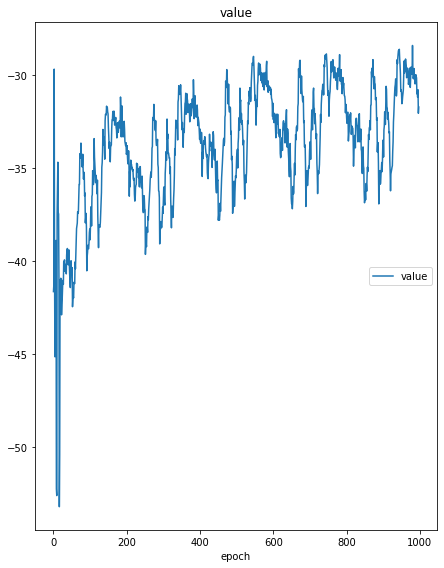

value
	value            	 (min:  -53.225, max:  -28.423, cur:  -31.733)


In [3]:
breaker = 0
recorders = {}
groups = {'value': ['value']}
plotlosses = PlotLosses(groups=groups)
for i in range(n_epoch):
    recorders[i] = {"state" : [], "action" : [], "reward" : []}
    observation = env.reset(T)
#     if i == 850:
#         break
    while True:
        action = RL.choose_action(observation)

        observation_, reward, done = env.online_step(action)
        RL.store_transition(observation, action, reward)

        recorders[i]["state"].append(observation)
        recorders[i]["action"].append(action)
        recorders[i]["reward"].append(reward)

        if done:
            running_rewards = RL.ep_rs.copy()
            gammas = arr([gamma ** t for t in range(len(running_rewards))])
            e_values[i] = np.sum(running_rewards * gammas)
            if i >= 100 and i % 100 == 0:
                if i >= 5000:
                    v = np.mean(e_values[(i - 5000):i])
                elif i >= 1000:
                    v = np.mean(e_values[(i - 1000):i])
                else:
                    v = np.mean(e_values[(i - 100):i])
                print("episode:", i, "  reward:", v)
                plotlosses.update({'value': v})
                plotlosses.send()
            vt = RL.learn()
            break

        observation = observation_
